# Event Stat

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import talib
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir(r"C:\Users\casper\Desktop\Casper\kronos competition\kronos-competition\get_data")

In [ ]:
def exceltime_to_pytime(data):# 将excel中两列时间转化为1列 如日期和小时分开
 
    date=pd.to_datetime(data['日期'],format='%Y年%m月%d日') # 将日期转化为Timestamp
    hour=np.array(data['时间']) # 将时间转化为array
    
    trans_time=[]
    for i in range(len(date)):
        a=date[i]+pd.Timedelta(hour[i],'h')+pd.Timedelta('30m')
        trans_time.append(a)
    return trans_time

In [20]:
df5 = pd.read_excel('ReleaseTime.xlsx',sheet_name="會議紀要", parse_dates=True)
a=date[i]+pd.Timedelta(df5['公佈日期'],'h')+pd.Timedelta('30m')


,公佈日期,時間
0,44847,02:00:00
1,44791,02:00:00
2,44749,02:00:00
3,44707,02:00:00
4,44658,02:00:00
5,44609,03:00:00
6,44567,03:00:00
7,44525,03:00:00
8,44483,02:00:00
9,44427,02:00:00


In [3]:
df1 = pd.read_csv('BTC_spotPrice_2021_1.csv', index_col='Datetime', parse_dates=True)
df2 = pd.read_csv('BTC_spotPrice_2021_2.csv', index_col='Datetime', parse_dates=True)
df3 = pd.read_csv('BTC_spotPrice_2022_1.csv', index_col='Datetime', parse_dates=True)
df4 = pd.read_csv('BTC_spotPrice_2022_2.csv', index_col='Datetime', parse_dates=True)

df = pd.concat([df1,df2,df3,df4])

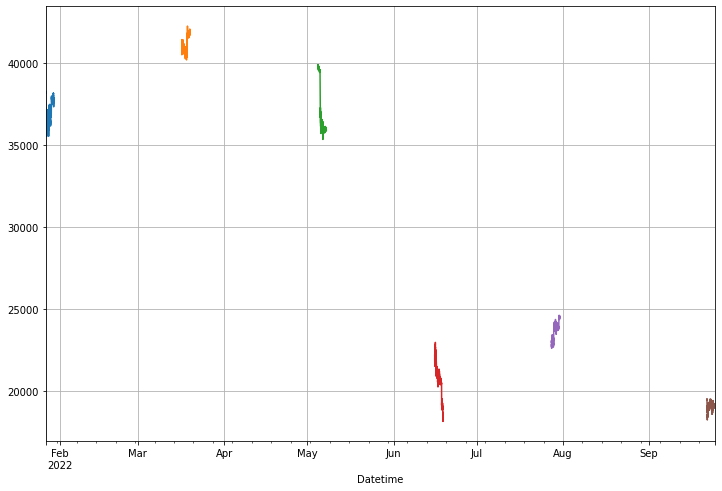

In [4]:
df.loc['2022-1-26 19:25:18':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-3-16 19:24:20':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-5-4 19:17:23':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-6-15 19:26:18':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-7-27 19:24:19':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-9-21 19:12:38':, 'Close'].iloc[:1440*3].plot(figsize=(12,8), grid=True);

#  Even study---Statistics
### 1. generate -n~+n days
### 2. plot 1.
### 3. T-test (Ho：Return(now_sample) !=0)
### 4. 二樣本K-S檢定（Two Sample Kolmogorov-Smirnov Test）(等等開完會補)

In [11]:
import sys
sys.path.append('../') # setting path
import plot.utils as es
# parameter
day=3
kbar=1
betalength=30


       T-score P-value Sig.
epoch                      
0      21.5726  0.0000  ***
        T-score P-value Sig.
epoch                       
0      -22.5638  0.0000  ***


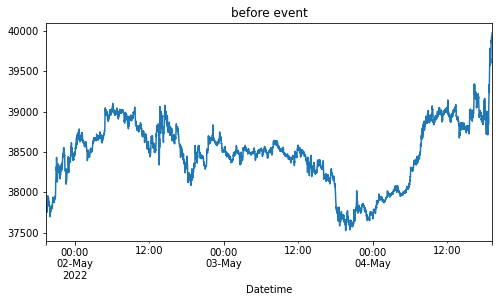

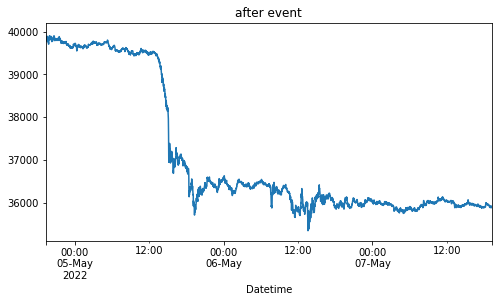

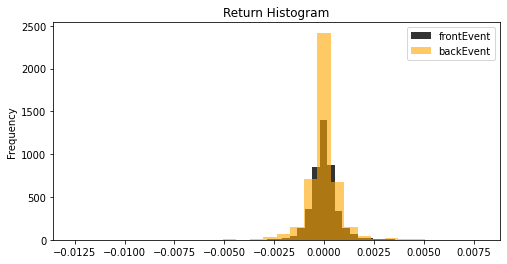

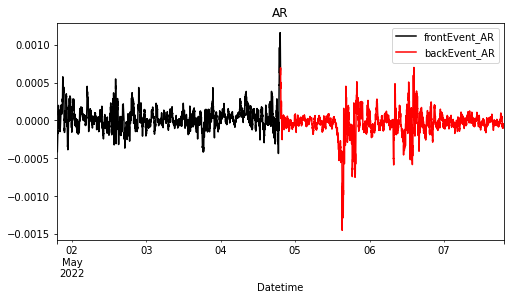

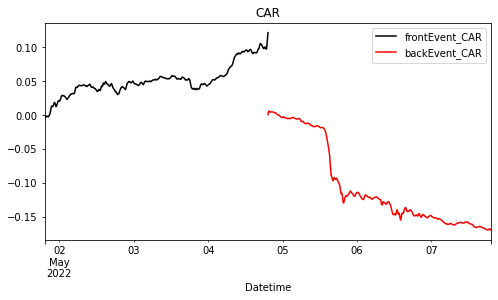

In [12]:
train_df,front_df,back_df,frontLength,backLength = es.es_date(df=df, 
    eventTime='2022-5-4 19:17', 
    trainMinute=(1440*day),
    frontMinute=(1440*day), backMinute=(1440*day), 
    kbar=kbar, betalength=betalength)
front_df,back_df=es.es_ARs(train_df,front_df),es.es_ARs(front_df,back_df)
front_tt,back_tt=es.ttest(front_df,len(front_df)),es.ttest(back_df,len(back_df))
print(front_tt)
print(back_tt)
es.es_hist(front_df,back_df)

### 下面還沒用

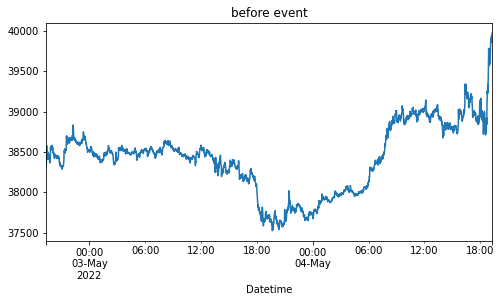

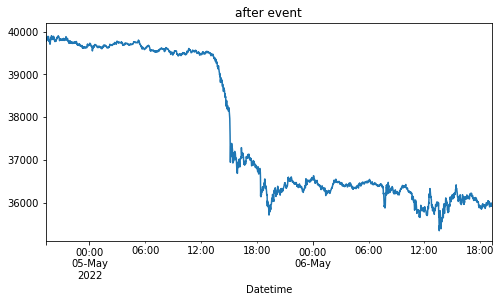

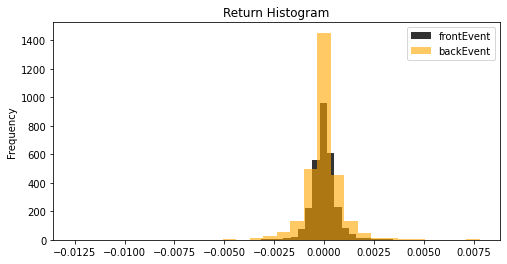

In [ ]:
result,front_df,back_df,before,after = es.event_stat(df=df, eventTime='2022-5-4 19:17', frontMinute=2880, backMinute=2880, kbar=1, betalength=30)

In [ ]:
stat

[[1.4935744348662709e-05,
  0.0006612295152041459,
  1.0845297633259727,
  9.884433618885277,
  51.699514365269664,
  5.082593929406726,
  29.294643973602096],
 [-3.6099623473799946e-05,
  0.0010105237998835881,
  -0.8243384554837775,
  22.51649089534588,
  46.77576049270479,
  12.735795601897944,
  39.01307051059395]]

* 每一類型的放進去跑迴圈
* 使用不同長度的length, 畫出 x軸時間 y軸rsi絕對值的夏普值之類，找出最好的rolling天數來做交易
* 經濟數據公布 有效期應該比較短、FED 有效期應該較長
* 美股相關性 太低不做
* Lag 幾期看看

In [ ]:
fed_meeting_timelist = ['2022-1-26 19:25', '2022-3-16 19:24', '2022-5-4 19:17:23', '2022-6-15 19:26', '2022-7-27 19:24', '2022-9-21 19:12']

In [ ]:
fed_meeting1 = []
fed_meeting2 = []

for t in fed_meeting_timelist:
    # print(t)
    stat = event_stat(df=df, eventTime=t, frontMinute=2880, backMinute=2880, kbar=15, print_=False, plot_=False)
    fed_meeting1.append(stat[0])
    fed_meeting2.append(stat[1])
    # print('\n')

In [ ]:
[i[5] for i in fed_meeting1]

[21.146138361814376,
 12.764590377089647,
 13.577027665671203,
 5.434863685981657,
 9.15351563754178,
 5.779726155243882]

In [ ]:
[i[5] for i in fed_meeting2]

[10.766287469671278,
 5.7866204802189225,
 42.17689101675112,
 5.671305680423815,
 18.705147379358838,
 7.095437382310323]

In [ ]:
np.mean([i[5] for i in fed_meeting1])

11.309310313890427

In [ ]:
np.mean([i[5] for i in fed_meeting2])

15.033614901455715